In [13]:
#random forest

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
df=pd.read_excel("glass.xlsx",sheet_name="glass")

In [42]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [43]:
df.shape

(214, 10)

In [44]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [46]:
#exploratory data analysis

In [47]:
#missing values
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [48]:
#no missing values


In [49]:
#checking duplicates
df.duplicated().sum()

np.int64(1)

In [50]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [51]:
df.duplicated().sum()

np.int64(0)

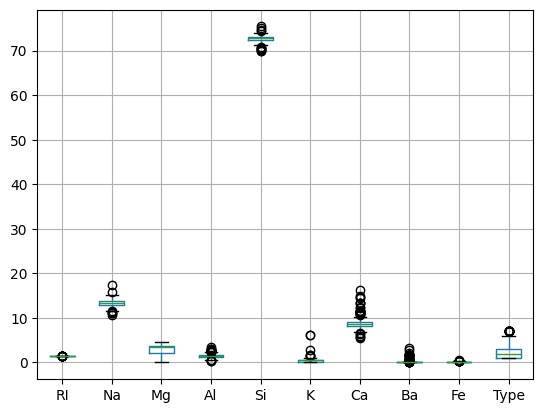

In [52]:
#outlier detection
df.boxplot()
plt.show()

In [53]:
# outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

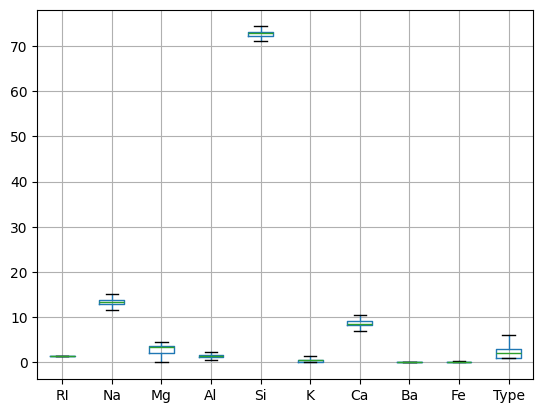

In [54]:
df.boxplot()
plt.show()

In [55]:
#data visualisation

<Figure size 2000x1500 with 0 Axes>

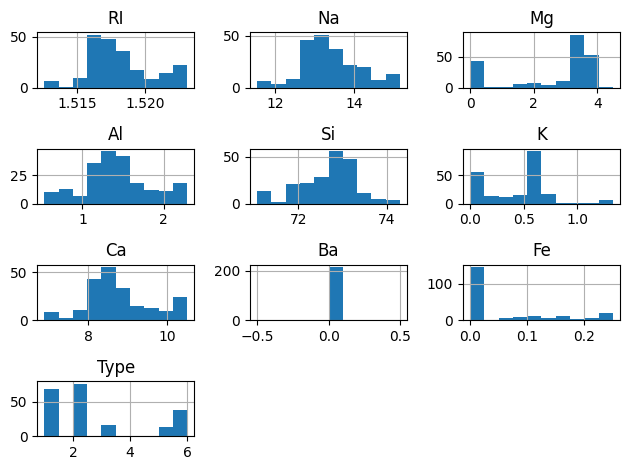

In [56]:
#histogram
plt.figure(figsize=(20,15))
df.hist()
plt.tight_layout()
plt.show()

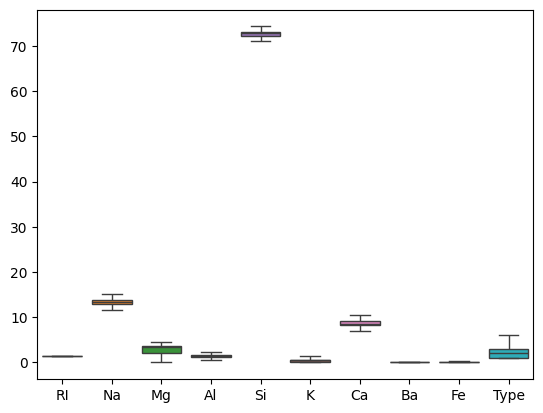

In [57]:
#boxplot
sns.boxplot(data=df)
plt.show()

<Figure size 3000x2000 with 0 Axes>

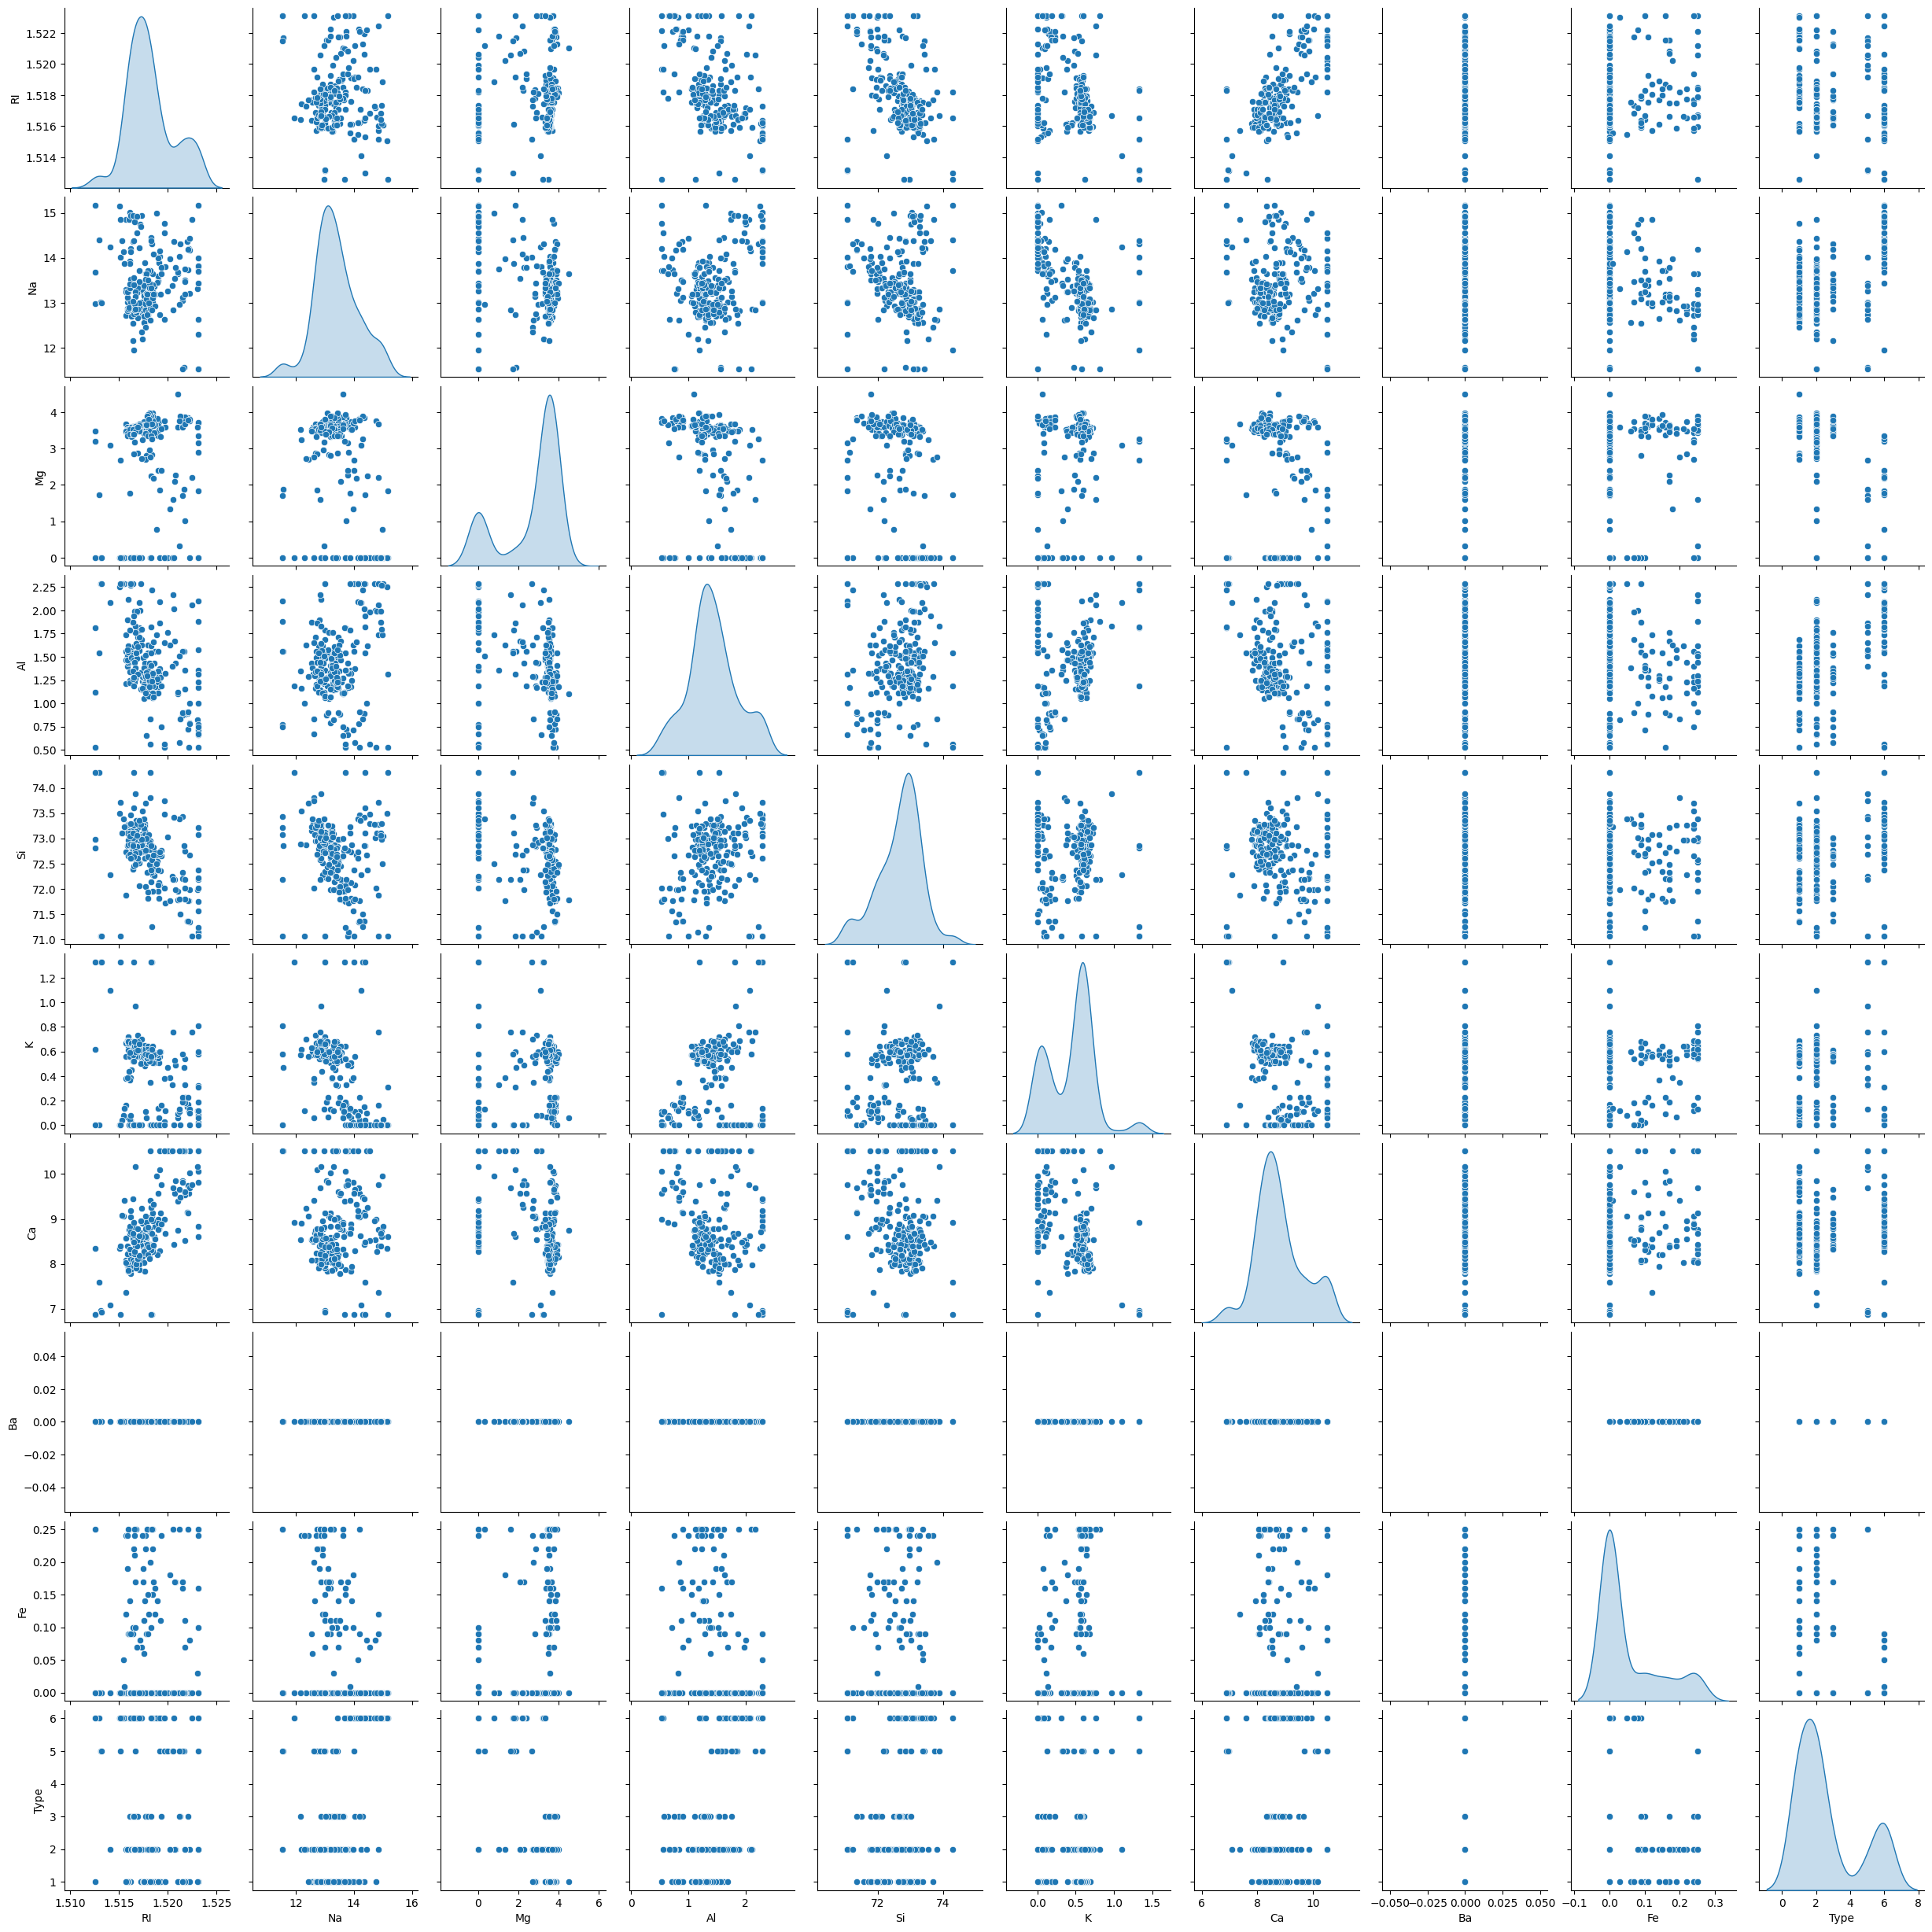

In [58]:
# pairplot
plt.figure(figsize=(30,20))
sns.pairplot(data=df,diag_kind='kde')
plt.show()

In [59]:
#correlation

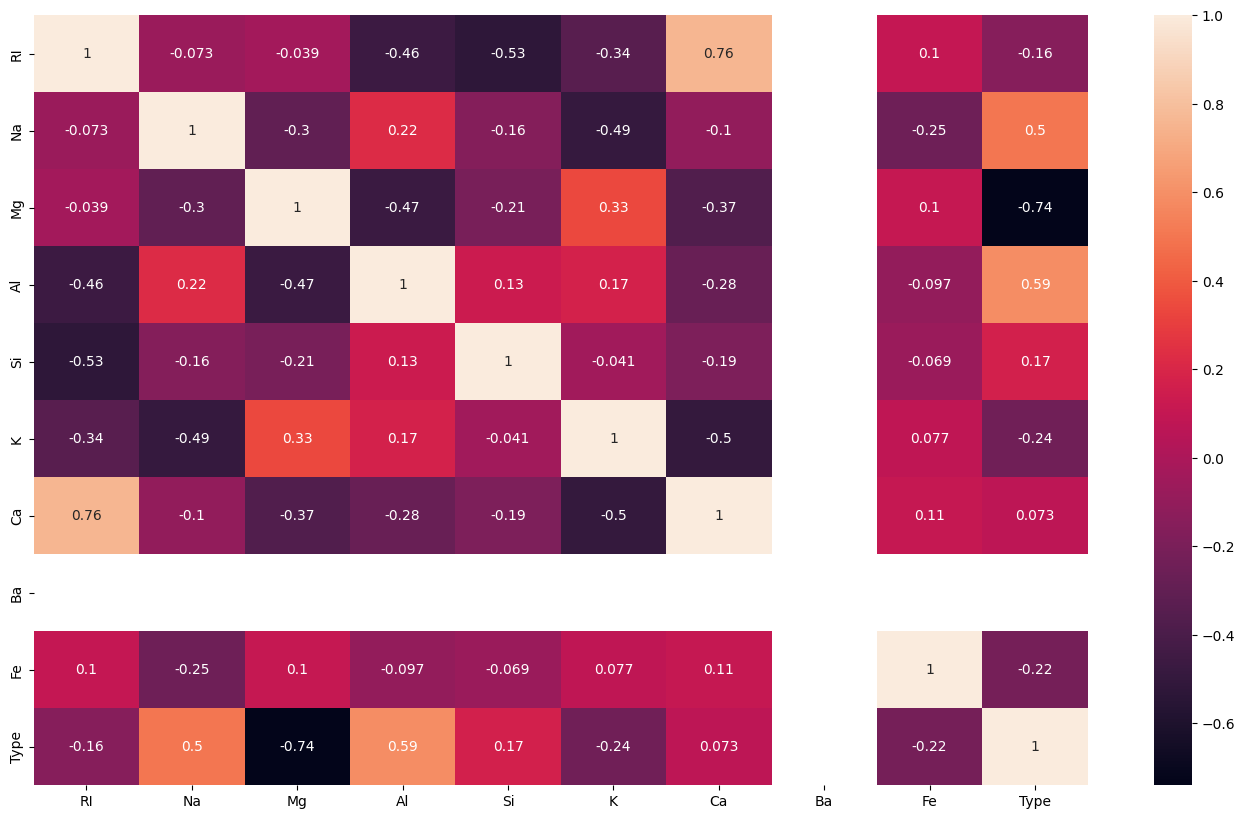

In [61]:
corr=df.corr()
plt.figure(figsize=(17,10))
sns.heatmap(corr,annot=True)
plt.show()

In [63]:
target=df[['Type']]
features=df.drop(columns=['Type'])

In [64]:
from sklearn.feature_selection import f_classif

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


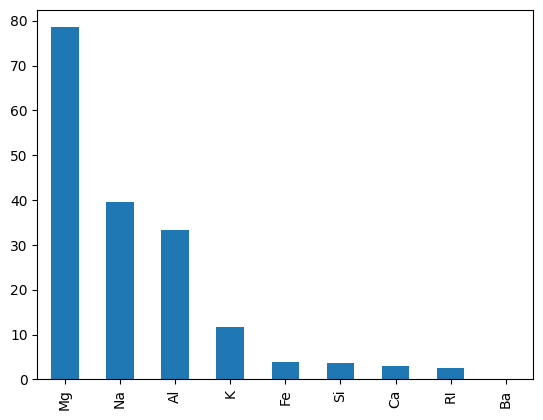

In [65]:
f_class=f_classif(features,target)
pd.Series(f_class[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [66]:
features.drop(columns=['Ba'],inplace=True)

In [67]:
features.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0


In [68]:
target.head()

,Type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [69]:
#data preprocessing

In [70]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [71]:
#no missing values

In [72]:
features.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Fe,float64


In [73]:
#since all are categorical so no need to do any encoding

In [74]:
std_sca=StandardScaler()


In [75]:
features[['Na','Mg','Si','Ca']]=std_sca.fit_transform(features[['Na','Mg','Si','Ca']])

In [76]:
features.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,1.52101,0.322680,1.257238,1.10,-1.361078,0.06,-0.044419,0.0
1,1.51761,0.660556,0.639311,1.36,0.086641,0.48,-1.115733,0.0
2,1.51618,0.174014,0.604596,1.54,0.482859,0.39,-1.173956,0.0
3,1.51766,-0.258467,0.701798,1.29,-0.096228,0.57,-0.661589,0.0
4,1.51742,-0.177377,0.653197,1.24,0.620012,0.55,-0.836260,0.0


In [78]:
#Imbalanced data are properly handled

In [79]:
#random forest implementation

In [80]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=150,stratify=target)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(149, 8)
(64, 8)
(149, 1)
(64, 1)


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [83]:
r_f=RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='sqrt',max_samples=0.9,random_state=50)

In [86]:
r_f.fit(x_train,y_train)
y_pred=r_f.predict(x_test)
print(accuracy_score(y_test,y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.75


In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.76      0.90      0.83        21
         2.0       0.94      0.65      0.77        23
         3.0       0.40      0.40      0.40         5
         5.0       0.33      0.50      0.40         4
         6.0       0.83      0.91      0.87        11

    accuracy                           0.75        64
   macro avg       0.65      0.67      0.65        64
weighted avg       0.78      0.75      0.75        64



In [88]:
#bagging and boosting

In [89]:
#bagging

In [90]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [91]:
bag_class=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=200,bootstrap=True,max_features=0.9,bootstrap_features=True,
                           max_samples=0.8,random_state=50)

In [92]:
bag_class.fit(x_train,y_train)
y_pred1=bag_class.predict(x_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75

In [93]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         1.0       0.80      0.95      0.87        21
         2.0       0.84      0.70      0.76        23
         3.0       0.33      0.20      0.25         5
         5.0       0.50      0.50      0.50         4
         6.0       0.77      0.91      0.83        11

    accuracy                           0.77        64
   macro avg       0.65      0.65      0.64        64
weighted avg       0.75      0.77      0.75        64



In [94]:
#boosting

In [103]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [104]:
ada_boost=AdaBoostClassifier(estimator=LogisticRegression(),n_estimators=100)

In [105]:
ada_boost.fit(x_train,y_train)
y_pred_a=ada_boost.predict(x_test)
accuracy_score(y_pred_a,y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.59375

In [106]:
print(classification_report(y_pred_a,y_test))

              precision    recall  f1-score   support

         1.0       0.62      0.65      0.63        20
         2.0       0.65      0.58      0.61        26
         3.0       0.00      0.00      0.00         3
         5.0       0.50      0.50      0.50         4
         6.0       0.73      0.73      0.73        11

    accuracy                           0.59        64
   macro avg       0.50      0.49      0.49        64
weighted avg       0.61      0.59      0.60        64



In [107]:
#gradient boost
grad_boost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.5,subsample=1.0,max_features=1,random_state=50)

In [108]:
grad_boost.fit(x_train,y_train)
y_pred_g=grad_boost.predict(x_test)
accuracy_score(y_pred_g,y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8125

In [ ]:
#additonal notes:


1) Explain Bagging and Boosting methods. How is it different from each other.?

a)Bagging is a method designed to reduce the variance of a single model, thereby helping to prevent overfitting. Boosting is an iterative method designed to reduce the bias of an ensemble, thereby improving the overall accuracy. The main goal of Bagging is to reduce variance and the main goal of Boosting is to reduce bias.

2.Explain how to handle imbalance in the data.?

a)Evaluation techniques like Confusion Matrix, Precision, Recall, F1-score and AUC-ROC curve can be used to handle imbalance in the data.

